# Reading and saving data from robot into a file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
#filename='/Users/viivihalla-aho/Documents/lego/legorobot/scripts/mvp_log_2022-05-01T14:13:36.log'
# Data with accumulated time and optimized code
#filename='C:\\Users\\antti\\legorobot\\scripts\\mvp_log_2022-05-07T16-20-44.log'
# One minute without stops
#filename='C:\\Users\\antti\\legorobot\\scripts\\mvp_log_2022-05-08T16-57-51.log'
# HUB not tilted
#filename='C:\\Users\\antti\\legorobot\\scripts\\mvp_log_2022-05-14T15-23-19.log'
# Less rough surface
#filename='C:\\Users\\antti\\legorobot\\scripts\\mvp_log_2022-05-14T15-29-10.log'
# Rotation experiment
filename='C:\\Users\\antti\\legorobot\\scripts\\mvp_log_2022-05-14T15-55-28.log'

In [51]:
acceleration = []
angular_velocity = []
timer= []
distances = []

def readmatrixline(file):
    return float(file.readline().strip().lstrip('[').rstrip('],').strip()) 

with open(filename,'r') as file:
    line = file.readline()
    while line:
        if 'acceleration' in line.strip():
            acceleration.append([readmatrixline(file) for _ in range(3)])
        elif 'angular_velocity' in line.strip():
            angular_velocity.append([readmatrixline(file) for _ in range(3)])
        elif 'time' in line.strip():
            timer.append(float(line.strip().split(' ')[1]))
        elif 'distance' in line.strip():
            distances.append(float(line.strip().split(' ')[1]))
        line = file.readline()

In [52]:
acceleration_a= np.array(acceleration)
distances_a = np.array(distances)
angular_velocity_a = np.array(angular_velocity)
timer_a = np.array(timer)

In [53]:
len(timer)

591

In [54]:
d_dict=dict(
    accelerationx=acceleration_a[:,0],
    accelerationy=acceleration_a[:,1],
    accelerationz=acceleration_a[:,2],
    distance=distances_a,
    angular_velocity_x=angular_velocity_a[:,0],
    angular_velocity_y=angular_velocity_a[:,1],
    angular_velocity_z=angular_velocity_a[:,2],
)

In [55]:
robot_df = pd.DataFrame(d_dict,index=pd.TimedeltaIndex(timer_a,unit='ms')) # used to be .cumsum() with delta times

In [56]:
np.sqrt(np.sum(robot_df.filter(regex='acceleration').mean(axis=0).values**2))

9.838472605442014

## Plotting the variables

<AxesSubplot:>

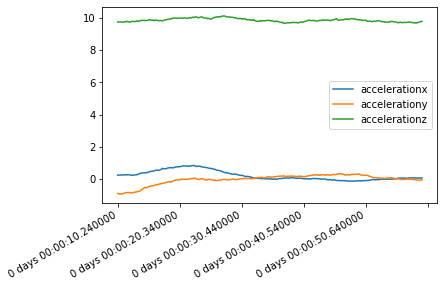

In [62]:
robot_df.filter(regex='acceleration').rolling(100).mean().plot()

<AxesSubplot:>

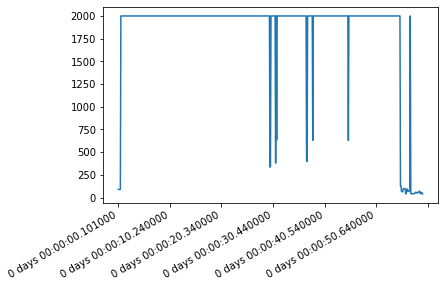

In [58]:
robot_df['distance'].plot()

<AxesSubplot:>

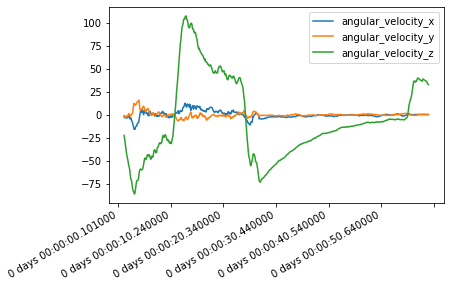

In [61]:
robot_df.filter(regex='angular_velocity').rolling(12).mean().plot()

In [31]:
robot_df.index

TimedeltaIndex(['0 days 00:00:00.129000', '0 days 00:00:00.230000',
                '0 days 00:00:00.331000', '0 days 00:00:00.432000',
                '0 days 00:00:00.533000', '0 days 00:00:00.634000',
                '0 days 00:00:00.735000', '0 days 00:00:00.836000',
                '0 days 00:00:00.937000', '0 days 00:00:01.038000',
                ...
                '0 days 00:00:29.035000', '0 days 00:00:29.136000',
                '0 days 00:00:29.237000', '0 days 00:00:29.338000',
                '0 days 00:00:29.439000', '0 days 00:00:29.540000',
                '0 days 00:00:29.641000', '0 days 00:00:29.742000',
                '0 days 00:00:29.843000', '0 days 00:00:29.944000'],
               dtype='timedelta64[ns]', length=294, freq=None)